# COVID-19 in Mexico
### Open data from the General Direction of epidemiology

**Project Description:** This is our first teamwork project that consists on analyze COVID-19 cases in Mexico.

***Team:*** Bernardo Jardon, Miguel Bonachea, Odin Del Toro, Pablo Arroyo. 

**Objective:** Determine the current situation of cases with COVID-19 in Mexico through the analysis and visualization of the evolution of variables related to the disease in time.

**Topics and research questions:**

**Evolution of the disease** Assigned to Odin. 

****Questions**** Odin
* What's the behaviour of the evolution and growth of the disease? 

***Considerations***
* First positive case of SARS-CoV-2 in Mexico was on 08 of January 2020.
* Phase I Imported cases: Mexican Health Secretary announce on 29 of February 2020 four confirmed contagious cases imported from Italy as in the following link [COVID-19 Phase I](https://coronavirus.gob.mx/2020/02/29/conferencia-29-de-febrero/)
* Phase II Community dispersion: Mexican Health Secretary announce on 24 of March 2020 the start of the phase with local confirmed cases that hadn't travel to foreign countries as in the following link [COVID-19 Phase II](https://coronavirus.gob.mx/2020/03/24/inicia-fase-2-por-coronavirus-covid-19/)
* Phase III Epidemy: Mexican Health Secretary announce on 21 of April 2020 the start of the phase with local and regional confirmed cases as in the following link [COVID-19 Phase III](https://coronavirus.gob.mx/2020/04/21/inicia-la-fase-3-por-covid-19/)
* Growth rate = ((number of cases new day/number of acummulated cases previous day)^(new date-previous date))-1

**Pre-existing diseases** Consider that you can modify the questions and the approach of each analysis so feel free to adjust Questions section, at last there will be a merged archive. Assigned to Pablo and Bernardo.

****Questions**** Pablo
* Which variables are more correlated (Risk groups and deaths)
* Which variables are more correlated to the increase of positive cases of COVID-19?
* What's the mortality rate and correlation for positive COVID-19 cases of death?

****Questions**** Bernardo
* Ambulatory cases related to diseases
* Interned cases related to diseases (% deaths)
* Intensive care unit cases (% deaths)
* Intubated cases

**Hospitals sectors** Consider that you can modify the questions and the approach of each analysis so feel free to adjust Questions section, at last there will be a merged archive. Assigned to Miguel. 

****Questions**** Miguel
* What's the distribution of cases in Mexico? What's the distribution per Health Centers? 
* Demand for patient care in hospitals, gender, location, age, etc...

***Related variables for all topics to use in analysis:*** Origin, Sector, Gender, Entities, Municipalities, Type of patients (Ambulatory|Hospitalized), Dates of of admission, symptoms and death, Age, Nationality and Diseases. 

***Notes:*** Remember to give notice of the analysis you will make when starting to it to avoid repetitive analysis because topics have a lot of related variables. For description of variables used in topics research review the descriptors file.

***Dataset:*** The data is extracted from the Mexican Health Secretary in the following link
[COVID-19](https://www.gob.mx/salud/documentos/datos-abiertos-152127?idiom=es)

***Data premises:*** 
* Data is updated on a daily basis. 
* Acummulated data as of 05/05/2020.
 
***Milestone structure tasks:***
* Data gathering. Find a dataset that accomplished the requirements for the analysis.
* Clean and format the datasets. Describe the process of data exploration and cleanup.
* Data processing and analysis.
* Data visualization. Find correlation between variables. Consider at least two visualizations per question and save them as PNG images. 
* Summarize findings with answers to the questions and a short description with relevant plots.
* Make a presentation that includes questions of the research, data source and process to find answer for questions, description of data exploration and cleanup process, analysis process, conclusions with numerical and visualizations summary, and interpretation of the findings from the results. 
 

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import sem
from scipy.stats import linregress

# Files to read
covid_mx_data = 'Resources/200505COVID19MEXICO.csv'
covid_mx_entities = 'Catalogues/Entities.csv'
covid_mx_gender = 'Catalogues/Gender.csv'
covid_mx_municipalities = 'Catalogues/Municipalities.csv'
covid_mx_nationality = 'Catalogues/Nationality.csv'
covid_mx_origin = 'Catalogues/Origin.csv'
covid_mx_results = 'Catalogues/Results.csv'
covid_mx_sector = 'Catalogues/Sector.csv'
covid_mx_patients = 'Catalogues/Type_of_patient.csv'
covid_mx_yes_no = 'Catalogues/Yes_or_No.csv'
covid_mx_clean = 'Resources/COVID_Clean_Data.csv'

# Read files
covid_mx_df = pd.read_csv(covid_mx_data, encoding='utf-8')
entities_df = pd.read_csv(covid_mx_entities, encoding='utf-8')
gender_df = pd.read_csv(covid_mx_gender, encoding='utf-8')
municipalities_df = pd.read_csv(covid_mx_municipalities, encoding='utf-8')
nationality_df = pd.read_csv(covid_mx_nationality, encoding='utf-8')
origin_df = pd.read_csv(covid_mx_origin, encoding='utf-8')
results_df = pd.read_csv(covid_mx_results, encoding='utf-8')
sector_df = pd.read_csv(covid_mx_sector, encoding='utf-8')
patients_df = pd.read_csv(covid_mx_patients, encoding='utf-8')
yes_no_df = pd.read_csv(covid_mx_yes_no, encoding='utf-8')
covid_mx_clean_df = pd.read_csv(covid_mx_clean, encoding='utf-8')

## Cleanup and format dataset

***Comments:***
* We had encountered that the data from source has special characters that can't be read with several encodings, so we had to replace values with VSC from source deleting accents from files.
* After removing accents, some capital letters change to lowercase in the catalogues.

In [2]:
# Use the function title to adjust values in column "ENTIDAD_FEDERATIVA"
entities_df['ENTIDAD_FEDERATIVA'] = entities_df['ENTIDAD_FEDERATIVA'].str.title()
entities_df

,CLAVE_ENTIDAD,ENTIDAD_FEDERATIVA,ABREVIATURA
0,1,Aguascalientes,AS
1,2,Baja California,BC
2,3,Baja California Sur,BS
3,4,Campeche,CC
4,5,Coahuila De Zaragoza,CL
5,6,Colima,CM
6,7,Chiapas,CS
7,8,Chihuahua,CH
8,9,Ciudad De Mexico,DF
9,10,Durango,DG


In [3]:
# Use the function upper to change lowercases in headers 
gender_df.rename(columns = str.upper ,inplace = True)
# Use the function title to adjust values in column "DESCRIPCION"
gender_df['DESCRIPCION'] = gender_df['DESCRIPCION'].str.title()
gender_df

,CLAVE,DESCRIPCION
0,1,Mujer
1,2,Hombre
2,99,No Especificado


In [4]:
# Use the function title to adjust values in column "MUNICIPIO"
municipalities_df['MUNICIPIO'] = municipalities_df['MUNICIPIO'].str.title()
municipalities_df

,CLAVE_MUNICIPIO,MUNICIPIO,CLAVE_ENTIDAD
0,1,Aguascalientes,1
1,2,Asientos,1
2,3,Calvillo,1
3,4,Cosio,1
4,5,Jesus Maria,1
...,...,...,...
2496,999,No Especificado,32
2497,999,No Especificado,36
2498,997,No Aplica,97
2499,998,Se Ignora,98


In [5]:
# Use the function upper to change lowercases in headers 
nationality_df.rename(columns = str.upper ,inplace = True)
# Use the function title to adjust values in column "DESCRIPCION"
nationality_df['DESCRIPCION'] = nationality_df['DESCRIPCION'].str.title()
nationality_df

,CLAVE,DESCRIPCION
0,1,Mexicana
1,2,Extranjera
2,99,No Especificado


In [6]:
# Use the function upper to change lowercases in headers 
origin_df.rename(columns = str.upper ,inplace = True)
# Use the function title to adjust values in column "DESCRIPCION" and return "USMER" to uppercases
origin_df['DESCRIPCION'] = origin_df['DESCRIPCION'].str.title()
origin_df['DESCRIPCION'] = origin_df['DESCRIPCION'].replace('Usmer', 'USMER')
origin_df['DESCRIPCION'] = origin_df['DESCRIPCION'].replace('Fuera De Usmer', 'Fuera De USMER')
origin_df

,CLAVE,DESCRIPCION
0,1,USMER
1,2,Fuera De USMER
2,99,No Especificado


In [7]:
# Use the function upper to change lowercases in headers 
results_df.rename(columns = str.upper ,inplace = True)
# Use the function title to adjust values in column "DESCRIPCION" and return "SARS-Cov" to uppercases and lowercases as it has to be
results_df['DESCRIPCION'] = results_df['DESCRIPCION'].str.title()
results_df['DESCRIPCION'] = results_df['DESCRIPCION'].replace('Positivo Sars-Cov-2', 'Positivo SARS-CoV-2')
results_df['DESCRIPCION'] = results_df['DESCRIPCION'].replace('No Positivo Sars-Cov-2', 'No Positivo SARS-CoV-2')
results_df

,CLAVE,DESCRIPCION
0,1,Positivo SARS-CoV-2
1,2,No Positivo SARS-CoV-2
2,3,Resultado Pendiente


In [8]:
# Use the function upper to change lowercases in headers 
sector_df.rename(columns = str.upper ,inplace = True)
# Use the function title to adjust values in column "DESCRIPCION" and return uppercases when needed
sector_df['DESCRIPCION'] = sector_df['DESCRIPCION'].str.title()
sector_df['DESCRIPCION'] = sector_df['DESCRIPCION'].replace('Dif', 'DIF')
sector_df['DESCRIPCION'] = sector_df['DESCRIPCION'].replace('Imss', 'IMSS')
sector_df['DESCRIPCION'] = sector_df['DESCRIPCION'].replace('Imss-Bienestar', 'IMSS-Bienestar')
sector_df['DESCRIPCION'] = sector_df['DESCRIPCION'].replace('Issste', 'ISSSTE')
sector_df['DESCRIPCION'] = sector_df['DESCRIPCION'].replace('Pemex', 'PEMEX')
sector_df['DESCRIPCION'] = sector_df['DESCRIPCION'].replace('Sedena', 'SEDENA')
sector_df['DESCRIPCION'] = sector_df['DESCRIPCION'].replace('Semar', 'SEMAR')
sector_df['DESCRIPCION'] = sector_df['DESCRIPCION'].replace('Ssa', 'SSA')
sector_df

,CLAVE,DESCRIPCION
0,1,Cruz Roja
1,2,DIF
2,3,Estatal
3,4,IMSS
4,5,IMSS-Bienestar
5,6,ISSSTE
6,7,Municipal
7,8,PEMEX
8,9,Privada
9,10,SEDENA


In [9]:
# Use the function upper to change lowercases in headers 
patients_df.rename(columns = str.upper ,inplace = True)
# Use the function title to adjust values in column "DESCRIPCION"
patients_df['DESCRIPCION'] = patients_df['DESCRIPCION'].str.title()
patients_df

,CLAVE,DESCRIPCION
0,1,Ambulatorio
1,2,Hospitalizado
2,99,No Especificado


In [10]:
# Use the function upper to change lowercases in headers 
yes_no_df.rename(columns = str.upper ,inplace = True)
# Use the function title to adjust values in column "DESCRIPCION"
yes_no_df['DESCRIPCION'] = yes_no_df['DESCRIPCION'].str.title()
yes_no_df

,CLAVE,DESCRIPCION
0,1,Si
1,2,No
2,97,No Aplica
3,98,Se Ignora
4,99,No Especificado


***Comments:***
* Even though we use replace all in VSC, there are still accents and some special characters in some countries which make them appear twice.

In [11]:
covid_mx_df['PAIS_NACIONALIDAD'].unique()

array(['Mexico', 'Estados Unidos de America', 'Cuba', 'Bolivia', 'España',
       'Colombia', 'China', 'Japon', 'Venezuela', 'Ecuador', 'Alemania',
       'Francia', 'El Salvador', 'Israel', 'Zona Neutral', 'Guatemala',
       'Hungria', 'Canada', 'Argentina', 'Republica de Honduras',
       'Italia', 'Republica Dominicana', 'Polonia',
       'Archipielago de Svalbard', 'Austria', 'Macao', 'Malasia',
       'Commonwealth de Dominica', 'Gran Bretaña (Reino Unido)', 'Iran',
       'Suiza', 'Suecia', 'Brasil', 'Ascension', 'Egipto',
       'Republica de Corea', 'Portugal', 'Rusia', 'Republica de Mauricio',
       'Micronesia', 'Holanda', 'Chile', 'Republica de Panama', 'Peru',
       'Nicaragua', 'India', 'Republica de Angola', 'Trieste', 'Haiti',
       'Rumania', 'Noruega', 'Zimbabwe', 'Republica de Costa Rica',
       'Principado de Monaco', 'Irlanda', 'Australia', 'México',
       'Estados Unidos de América', 'Republica Oriental del Uruguay',
       'Grecia', 'Bosnia y Herzegovina', '

In [12]:
# Change the special characters to how they must be
covid_mx_df['PAIS_NACIONALIDAD'] = covid_mx_df['PAIS_NACIONALIDAD'].replace('México', 'Mexico')
covid_mx_df['PAIS_NACIONALIDAD'] = covid_mx_df['PAIS_NACIONALIDAD'].replace('Estados Unidos de América', 'Estados Unidos de America')
covid_mx_df['PAIS_NACIONALIDAD'] = covid_mx_df['PAIS_NACIONALIDAD'].replace('España', 'Espana')
covid_mx_df['PAIS_NACIONALIDAD'] = covid_mx_df['PAIS_NACIONALIDAD'].replace('Gran Bretaña (Reino Unido)', 'Gran Bretana (Reino Unido)')
covid_mx_df['PAIS_NACIONALIDAD'].unique()

array(['Mexico', 'Estados Unidos de America', 'Cuba', 'Bolivia', 'Espana',
       'Colombia', 'China', 'Japon', 'Venezuela', 'Ecuador', 'Alemania',
       'Francia', 'El Salvador', 'Israel', 'Zona Neutral', 'Guatemala',
       'Hungria', 'Canada', 'Argentina', 'Republica de Honduras',
       'Italia', 'Republica Dominicana', 'Polonia',
       'Archipielago de Svalbard', 'Austria', 'Macao', 'Malasia',
       'Commonwealth de Dominica', 'Gran Bretana (Reino Unido)', 'Iran',
       'Suiza', 'Suecia', 'Brasil', 'Ascension', 'Egipto',
       'Republica de Corea', 'Portugal', 'Rusia', 'Republica de Mauricio',
       'Micronesia', 'Holanda', 'Chile', 'Republica de Panama', 'Peru',
       'Nicaragua', 'India', 'Republica de Angola', 'Trieste', 'Haiti',
       'Rumania', 'Noruega', 'Zimbabwe', 'Republica de Costa Rica',
       'Principado de Monaco', 'Irlanda', 'Australia',
       'Republica Oriental del Uruguay', 'Grecia', 'Bosnia y Herzegovina',
       'Argelia', 'Otro', 'Ucrania', 'Belice', 

In [13]:
covid_mx_df['PAIS_ORIGEN'].unique()

array(['99', 'Cuba', 'Espa�a', 'Grecia', 'Egipto', 'Alemania',
       'Rep�blica de Honduras', 'Ecuador', 'Estados Unidos de Am�rica',
       'Venezuela', 'El Salvador', 'Guatemala', 'Hait�', 'Colombia',
       'Otro', 'Bolivia', 'Nicaragua', 'Eritrea', 'Camer�n', 'Per�',
       'Jap�n', 'Canad�', 'Chile', 'Belice', 'Brasil', 'Irlanda',
       'Costa de Marfil', 'Italia', 'Francia'], dtype=object)

In [14]:
# Change the special characters to how they must be
covid_mx_df['PAIS_ORIGEN'] = covid_mx_df['PAIS_ORIGEN'].replace('Espa�a', 'Espana')
covid_mx_df['PAIS_ORIGEN'] = covid_mx_df['PAIS_ORIGEN'].replace('Rep�blica de Honduras', 'Republica de Honduras')
covid_mx_df['PAIS_ORIGEN'] = covid_mx_df['PAIS_ORIGEN'].replace('Estados Unidos de Am�rica', 'Estados Unidos de America')
covid_mx_df['PAIS_ORIGEN'] = covid_mx_df['PAIS_ORIGEN'].replace('Hait�', 'Haiti')
covid_mx_df['PAIS_ORIGEN'] = covid_mx_df['PAIS_ORIGEN'].replace('Camer�n', 'Camerun')
covid_mx_df['PAIS_ORIGEN'] = covid_mx_df['PAIS_ORIGEN'].replace('Per�', 'Peru')
covid_mx_df['PAIS_ORIGEN'] = covid_mx_df['PAIS_ORIGEN'].replace('Jap�n', 'Japon')
covid_mx_df['PAIS_ORIGEN'] = covid_mx_df['PAIS_ORIGEN'].replace('Canad�', 'Canada')
covid_mx_df['PAIS_ORIGEN'] = covid_mx_df['PAIS_ORIGEN'].replace('99', 'No Especificado')
covid_mx_df['PAIS_ORIGEN'].unique()

array(['No Especificado', 'Cuba', 'Espana', 'Grecia', 'Egipto',
       'Alemania', 'Republica de Honduras', 'Ecuador',
       'Estados Unidos de America', 'Venezuela', 'El Salvador',
       'Guatemala', 'Haiti', 'Colombia', 'Otro', 'Bolivia', 'Nicaragua',
       'Eritrea', 'Camerun', 'Peru', 'Japon', 'Canada', 'Chile', 'Belice',
       'Brasil', 'Irlanda', 'Costa de Marfil', 'Italia', 'Francia'],
      dtype=object)

In [15]:
# Convert text date columns into datetime and replace 9999-99-99 for 2020-12-31 as date of still alive
covid_mx_df['FECHA_INGRESO'] = pd.to_datetime(covid_mx_df['FECHA_INGRESO'], format='%Y-%m-%d')
covid_mx_df['FECHA_SINTOMAS'] = pd.to_datetime(covid_mx_df['FECHA_SINTOMAS'], format='%Y-%m-%d')
covid_mx_df['FECHA_DEF'] = covid_mx_df['FECHA_DEF'].replace('9999-99-99','2020-12-31')
covid_mx_df['FECHA_DEF'] = pd.to_datetime(covid_mx_df['FECHA_DEF'], format='%Y-%m-%d')
covid_mx_df

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-05,0e056a,1,4,2,2,2,2,4,1,...,2,2,2,2,99,1,99,Mexico,No Especificado,97
1,2020-05-05,108695,1,4,9,2,9,9,15,2,...,1,1,2,2,99,1,99,Mexico,No Especificado,2
2,2020-05-05,0342f4,1,12,32,2,31,32,6,2,...,2,1,2,1,2,2,99,Mexico,No Especificado,2
3,2020-05-05,0c09bc,1,4,15,2,15,15,58,2,...,2,2,2,1,99,2,99,Mexico,No Especificado,2
4,2020-05-05,188377,1,4,9,2,9,9,5,1,...,2,2,2,2,99,2,99,Mexico,No Especificado,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105659,2020-05-05,0f3cb0,2,4,25,1,16,25,1,1,...,2,2,1,2,99,3,99,Mexico,No Especificado,97
105660,2020-05-05,0a9847,2,12,11,2,11,11,20,1,...,2,2,2,2,2,3,99,Mexico,No Especificado,97
105661,2020-05-05,1c66c5,1,12,19,2,19,19,39,1,...,2,2,2,2,2,3,99,Mexico,No Especificado,97
105662,2020-05-05,1d0929,2,4,2,1,25,2,3,1,...,2,2,2,2,99,3,99,Mexico,No Especificado,97


***Comments:***
* Now that all the data has the format we expect, extract the values from the codes in catalogues to the main DB based on the descriptors file

In [16]:
# Entities
for index, row in entities_df.iterrows():
    code = row['CLAVE_ENTIDAD']
    value = row['ENTIDAD_FEDERATIVA']
    covid_mx_df['ENTIDAD_UM'] =  covid_mx_df['ENTIDAD_UM'].replace(code, value)
    covid_mx_df['ENTIDAD_NAC'] =  covid_mx_df['ENTIDAD_NAC'].replace(code, value)
    covid_mx_df['ENTIDAD_RES'] =  covid_mx_df['ENTIDAD_RES'].replace(code, value)

# Gender    
for index, row in gender_df.iterrows():
    code = row['CLAVE']
    value = row['DESCRIPCION']
    covid_mx_df['SEXO'] =  covid_mx_df['SEXO'].replace(code, value)

# Municipalities
for index, row in municipalities_df.iterrows():
    code = row['CLAVE_MUNICIPIO']
    value = row['MUNICIPIO']
    covid_mx_df['MUNICIPIO_RES'] =  covid_mx_df['MUNICIPIO_RES'].replace(code, value)

# Nationality
for index, row in nationality_df.iterrows():
    code = row['CLAVE']
    value = row['DESCRIPCION']
    covid_mx_df['NACIONALIDAD'] =  covid_mx_df['NACIONALIDAD'].replace(code, value)

# Origin
for index, row in origin_df.iterrows():
    code = row['CLAVE']
    value = row['DESCRIPCION']
    covid_mx_df['ORIGEN'] =  covid_mx_df['ORIGEN'].replace(code, value)
    
# Results
for index, row in results_df.iterrows():
    code = row['CLAVE']
    value = row['DESCRIPCION']
    covid_mx_df['RESULTADO'] =  covid_mx_df['RESULTADO'].replace(code, value)

# Sectors
for index, row in sector_df.iterrows():
    code = row['CLAVE']
    value = row['DESCRIPCION']
    covid_mx_df['SECTOR'] =  covid_mx_df['SECTOR'].replace(code, value)

# Patients
for index, row in patients_df.iterrows():
    code = row['CLAVE']
    value = row['DESCRIPCION']
    covid_mx_df['TIPO_PACIENTE'] =  covid_mx_df['TIPO_PACIENTE'].replace(code, value)

# Yes No
for index, row in yes_no_df.iterrows():
    code = row['CLAVE']
    value = row['DESCRIPCION']
    covid_mx_df['TIPO_PACIENTE'] =  covid_mx_df['TIPO_PACIENTE'].replace(code, value)
    covid_mx_df['NEUMONIA'] =  covid_mx_df['NEUMONIA'].replace(code, value)
    covid_mx_df['EMBARAZO'] =  covid_mx_df['EMBARAZO'].replace(code, value)
    covid_mx_df['INTUBADO'] =  covid_mx_df['INTUBADO'].replace(code, value)
    covid_mx_df['HABLA_LENGUA_INDIG'] =  covid_mx_df['HABLA_LENGUA_INDIG'].replace(code, value)
    covid_mx_df['DIABETES'] =  covid_mx_df['DIABETES'].replace(code, value)
    covid_mx_df['EPOC'] =  covid_mx_df['EPOC'].replace(code, value)
    covid_mx_df['ASMA'] =  covid_mx_df['ASMA'].replace(code, value)
    covid_mx_df['INMUSUPR'] =  covid_mx_df['INMUSUPR'].replace(code, value)
    covid_mx_df['HIPERTENSION'] =  covid_mx_df['HIPERTENSION'].replace(code, value)
    covid_mx_df['OTRA_COM'] =  covid_mx_df['OTRA_COM'].replace(code, value)
    covid_mx_df['CARDIOVASCULAR'] =  covid_mx_df['CARDIOVASCULAR'].replace(code, value)
    covid_mx_df['OBESIDAD'] =  covid_mx_df['OBESIDAD'].replace(code, value)
    covid_mx_df['RENAL_CRONICA'] =  covid_mx_df['RENAL_CRONICA'].replace(code, value)
    covid_mx_df['TABAQUISMO'] =  covid_mx_df['TABAQUISMO'].replace(code, value)
    covid_mx_df['OTRO_CASO'] =  covid_mx_df['OTRO_CASO'].replace(code, value)
    covid_mx_df['MIGRANTE'] =  covid_mx_df['MIGRANTE'].replace(code, value)
    covid_mx_df['UCI'] =  covid_mx_df['UCI'].replace(code, value)
    
covid_mx_df

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-05,0e056a,USMER,IMSS,Baja California,Hombre,Baja California,Baja California,Cosio,Ambulatorio,...,No,No,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No Aplica
1,2020-05-05,108695,USMER,IMSS,Ciudad De Mexico,Hombre,Ciudad De Mexico,Ciudad De Mexico,Juarez,Hospitalizado,...,Si,Si,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
2,2020-05-05,0342f4,USMER,SSA,Zacatecas,Hombre,Yucatan,Zacatecas,Pabellon De Arteaga,Hospitalizado,...,No,Si,No,Si,No,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
3,2020-05-05,0c09bc,USMER,IMSS,Mexico,Hombre,Mexico,Mexico,Nicolas Ruiz,Hospitalizado,...,No,No,No,Si,No Especificado,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
4,2020-05-05,188377,USMER,IMSS,Ciudad De Mexico,Hombre,Ciudad De Mexico,Ciudad De Mexico,Jesus Maria,Ambulatorio,...,No,No,No,No,No Especificado,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No Aplica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105659,2020-05-05,0f3cb0,Fuera De USMER,IMSS,Sinaloa,Mujer,Michoacan De Ocampo,Sinaloa,Aguascalientes,Ambulatorio,...,No,No,Si,No,No Especificado,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105660,2020-05-05,0a9847,Fuera De USMER,SSA,Guanajuato,Hombre,Guanajuato,Guanajuato,Muzquiz,Ambulatorio,...,No,No,No,No,No,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105661,2020-05-05,1c66c5,USMER,SSA,Nuevo Leon,Hombre,Nuevo Leon,Nuevo Leon,Huitiupan,Ambulatorio,...,No,No,No,No,No,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105662,2020-05-05,1d0929,Fuera De USMER,IMSS,Baja California,Mujer,Sinaloa,Baja California,Calvillo,Ambulatorio,...,No,No,No,No,No Especificado,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica


In [17]:
# Check missing data
covid_mx_df = covid_mx_df.dropna(how="any")
# Fill na with empty value
covid_mx_df = covid_mx_df.fillna('')
# Validate changes
covid_mx_df

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-05,0e056a,USMER,IMSS,Baja California,Hombre,Baja California,Baja California,Cosio,Ambulatorio,...,No,No,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No Aplica
1,2020-05-05,108695,USMER,IMSS,Ciudad De Mexico,Hombre,Ciudad De Mexico,Ciudad De Mexico,Juarez,Hospitalizado,...,Si,Si,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
2,2020-05-05,0342f4,USMER,SSA,Zacatecas,Hombre,Yucatan,Zacatecas,Pabellon De Arteaga,Hospitalizado,...,No,Si,No,Si,No,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
3,2020-05-05,0c09bc,USMER,IMSS,Mexico,Hombre,Mexico,Mexico,Nicolas Ruiz,Hospitalizado,...,No,No,No,Si,No Especificado,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
4,2020-05-05,188377,USMER,IMSS,Ciudad De Mexico,Hombre,Ciudad De Mexico,Ciudad De Mexico,Jesus Maria,Ambulatorio,...,No,No,No,No,No Especificado,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No Aplica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105659,2020-05-05,0f3cb0,Fuera De USMER,IMSS,Sinaloa,Mujer,Michoacan De Ocampo,Sinaloa,Aguascalientes,Ambulatorio,...,No,No,Si,No,No Especificado,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105660,2020-05-05,0a9847,Fuera De USMER,SSA,Guanajuato,Hombre,Guanajuato,Guanajuato,Muzquiz,Ambulatorio,...,No,No,No,No,No,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105661,2020-05-05,1c66c5,USMER,SSA,Nuevo Leon,Hombre,Nuevo Leon,Nuevo Leon,Huitiupan,Ambulatorio,...,No,No,No,No,No,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105662,2020-05-05,1d0929,Fuera De USMER,IMSS,Baja California,Mujer,Sinaloa,Baja California,Calvillo,Ambulatorio,...,No,No,No,No,No Especificado,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica


In [18]:
covid_mx_df.dtypes

FECHA_ACTUALIZACION            object
ID_REGISTRO                    object
ORIGEN                         object
SECTOR                         object
ENTIDAD_UM                     object
SEXO                           object
ENTIDAD_NAC                    object
ENTIDAD_RES                    object
MUNICIPIO_RES                  object
TIPO_PACIENTE                  object
FECHA_INGRESO          datetime64[ns]
FECHA_SINTOMAS         datetime64[ns]
FECHA_DEF              datetime64[ns]
INTUBADO                       object
NEUMONIA                       object
EDAD                            int64
NACIONALIDAD                   object
EMBARAZO                       object
HABLA_LENGUA_INDIG             object
DIABETES                       object
EPOC                           object
ASMA                           object
INMUSUPR                       object
HIPERTENSION                   object
OTRA_COM                       object
CARDIOVASCULAR                 object
OBESIDAD    

***Comments:***
* Now that we have finished cleaning all the data, let's continue with the analysis. 

In [19]:
# Export new main DB to csv file
covid_mx_df.to_csv("Resources/COVID_Clean_Data.csv")

## Data analysis and visualization

In [20]:
# Use the new csv file to start the analysis 
del covid_mx_clean_df['Unnamed: 0']
del covid_mx_clean_df['FECHA_ACTUALIZACION']
covid_mx_clean_df

,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,0e056a,USMER,IMSS,Baja California,Hombre,Baja California,Baja California,Cosio,Ambulatorio,2020-03-19,...,No,No,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No Aplica
1,108695,USMER,IMSS,Ciudad De Mexico,Hombre,Ciudad De Mexico,Ciudad De Mexico,Juarez,Hospitalizado,2020-03-23,...,Si,Si,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
2,0342f4,USMER,SSA,Zacatecas,Hombre,Yucatan,Zacatecas,Pabellon De Arteaga,Hospitalizado,2020-03-29,...,No,Si,No,Si,No,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
3,0c09bc,USMER,IMSS,Mexico,Hombre,Mexico,Mexico,Nicolas Ruiz,Hospitalizado,2020-03-29,...,No,No,No,Si,No Especificado,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
4,188377,USMER,IMSS,Ciudad De Mexico,Hombre,Ciudad De Mexico,Ciudad De Mexico,Jesus Maria,Ambulatorio,2020-03-28,...,No,No,No,No,No Especificado,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No Aplica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105659,0f3cb0,Fuera De USMER,IMSS,Sinaloa,Mujer,Michoacan De Ocampo,Sinaloa,Aguascalientes,Ambulatorio,2020-05-05,...,No,No,Si,No,No Especificado,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105660,0a9847,Fuera De USMER,SSA,Guanajuato,Hombre,Guanajuato,Guanajuato,Muzquiz,Ambulatorio,2020-05-05,...,No,No,No,No,No,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105661,1c66c5,USMER,SSA,Nuevo Leon,Hombre,Nuevo Leon,Nuevo Leon,Huitiupan,Ambulatorio,2020-05-05,...,No,No,No,No,No,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105662,1d0929,Fuera De USMER,IMSS,Baja California,Mujer,Sinaloa,Baja California,Calvillo,Ambulatorio,2020-05-05,...,No,No,No,No,No Especificado,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica


##### First question
**Evolution of the disease**

***What's the behaviour of the evolution and growth of the disease?*** 

In [21]:
# Estimate total accumulated cases
covid_mx_clean_df['ID_REGISTRO'].nunique()

105664

##### Evolution of cases by results

In [22]:
# Determine the distribution of confirmed, negative and suspected cases considering decease, intubated and intensive care units cases as risk casess
covid_cases = covid_mx_clean_df['RESULTADO']
covid_cases.value_counts()

No Positivo SARS-CoV-2    63540
Positivo SARS-CoV-2       26025
Resultado Pendiente       16099
Name: RESULTADO, dtype: int64

In [23]:
# Estimate decease cases
covid_decease_cases = covid_mx_clean_df['FECHA_DEF'].loc[covid_mx_clean_df['FECHA_DEF']!='2020-12-31']
covid_decease_cases = covid_decease_cases.count()
covid_decease_cases

3924

In [24]:
# Estimate intubated cases
covid_intubated_cases = covid_mx_clean_df['INTUBADO'].loc[covid_mx_clean_df['INTUBADO']=='Si ']
covid_intubated_cases = covid_intubated_cases.count()
covid_intubated_cases

2125

In [25]:
# Estimate ICU cases
covid_UCI_cases = covid_mx_clean_df['UCI'].loc[covid_mx_clean_df['UCI']=='Si ']
covid_UCI_cases = covid_UCI_cases.count()
covid_UCI_cases

2352

In [26]:
# Create a dataframe with risk values for pie chart
covid_total_cases = covid_mx_clean_df['ID_REGISTRO'].nunique()
covid_risk_decease = round(covid_decease_cases / covid_total_cases,2)
covid_risk_intubated = round(covid_intubated_cases / covid_total_cases,2) 
covid_risk_ICU = round(covid_UCI_cases / covid_total_cases,2)
covid_risk_df = pd.DataFrame({'RISK CASES':['DECEASE','INTUBATED','ICU','REST OF CASES'],'SUM CASES':[3924,2125,2352,97263],'PERCENTAGE TOTAL CASES':[.04,.02,.02,.92]})
covid_risk_df["PERCENTAGE TOTAL CASES"] = covid_risk_df["PERCENTAGE TOTAL CASES"].map("{:,.0%}".format)
covid_risk_df

,RISK CASES,SUM CASES,PERCENTAGE TOTAL CASES
0,DECEASE,3924,4%
1,INTUBATED,2125,2%
2,ICU,2352,2%
3,REST OF CASES,97263,92%


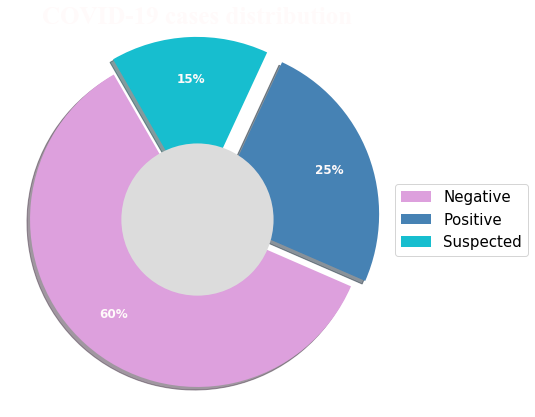

In [27]:
# Make a pie chart that illustrates the distribution of the COVID-19 cases in Mexico
colors=['plum','steelblue','tab:cyan']
explode = (0, 0.1, 0.1)
covid_cases_count = covid_mx_clean_df['RESULTADO'].value_counts()
covid_cases_count.plot(kind='pie',labels=None,autopct='%1.0f%%',colors=colors,figsize=(7,7),fontsize=12,startangle=120,explode=explode,shadow=True,pctdistance=.75,textprops={'color':'snow','weight':'semibold'},radius=1.1)
plt.title('COVID-19 cases distribution',fontsize=25,color='snow', fontweight='semibold', family='Times New Roman')
plt.axis('off')
plt.legend(labels=['Negative','Positive','Suspected'],loc='center left',prop={'size': 15}, bbox_to_anchor=(1.0, 0.5))
centre_circle = plt.Circle((0,0),0.50,fc='gainsboro')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.savefig('Results_visualizations/COVID-19_cases_distribution.png')
plt.show()

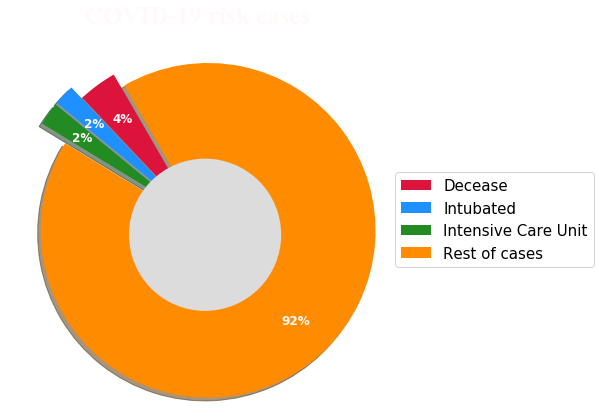

In [28]:
# Make a pie chart that illustrates the distribution of the COVID-19 risk positive cases 
colors=['crimson','dodgerblue','forestgreen','darkorange']
explode = (0, 0.1, 0.1,0.1)
plt.figure(figsize=(7,7))
risk_cases=['DECEASE','INTUBATED','ICU','REST OF CASES']
sum_cases=[3924,2125,2352,97263]
plt.pie(sum_cases,autopct='%1.0f%%',colors=colors,startangle=120,explode=explode,shadow=True,pctdistance=.75,textprops={'fontsize':12,'color':'snow','weight':'semibold'},radius=1.1)
plt.title('COVID-19 risk cases',fontsize=25,color='snow', fontweight='semibold', family='Times New Roman')
plt.axis('off')
plt.legend(labels=['Decease','Intubated','Intensive Care Unit','Rest of cases'],loc='center left',prop={'size': 15}, bbox_to_anchor=(1.0, 0.5))
centre_circle = plt.Circle((0.05,-0.1),0.50,fc='gainsboro')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.savefig('Results_visualizations/COVID-19_risk_cases_distribution.png')
plt.show()

In [29]:
# Set a new dataframe with date and cases results
covid_cases_df = covid_mx_clean_df[['FECHA_INGRESO','RESULTADO']]
covid_cases_df.sort_values(by='FECHA_INGRESO',ascending=True)

,FECHA_INGRESO,RESULTADO
43099,2020-01-01,No Positivo SARS-CoV-2
66259,2020-01-01,No Positivo SARS-CoV-2
56225,2020-01-01,No Positivo SARS-CoV-2
43746,2020-01-01,No Positivo SARS-CoV-2
58171,2020-01-01,No Positivo SARS-CoV-2
...,...,...
102706,2020-05-05,Resultado Pendiente
102707,2020-05-05,Resultado Pendiente
102708,2020-05-05,Resultado Pendiente
102712,2020-05-05,Resultado Pendiente


In [30]:
# Accumulated positive COVID-19 cases per day
covid_cases_positive_df = covid_cases_df.loc[covid_cases_df['RESULTADO'] == 'Positivo SARS-CoV-2',:]
covid_cases_positive_df = covid_cases_positive_df.groupby(covid_cases_positive_df['FECHA_INGRESO']).count()
covid_cases_positive_df = covid_cases_positive_df.sort_values(by='FECHA_INGRESO',ascending=True)
covid_cases_positive_df['POSITIVOS'] = covid_cases_positive_df.cumsum()
del covid_cases_positive_df['RESULTADO']
covid_cases_positive_df

,POSITIVOS
FECHA_INGRESO,
2020-01-08,1
2020-01-14,2
2020-02-07,3
2020-02-18,4
2020-02-27,8
...,...
2020-05-01,25291
2020-05-02,25739
2020-05-03,25942


In [31]:
# Accumulated negative COVID-19 cases per day
covid_cases_negative_df = covid_cases_df.loc[covid_cases_df['RESULTADO'] == 'No Positivo SARS-CoV-2',:]
covid_cases_negative_df = covid_cases_negative_df.groupby(covid_cases_negative_df['FECHA_INGRESO']).count()
covid_cases_negative_df = covid_cases_negative_df.sort_values(by='FECHA_INGRESO',ascending=True)
covid_cases_negative_df['NEGATIVOS'] = covid_cases_negative_df.cumsum()
del covid_cases_negative_df['RESULTADO']
covid_cases_negative_df

,NEGATIVOS
FECHA_INGRESO,
2020-01-01,5
2020-01-02,21
2020-01-03,39
2020-01-04,45
2020-01-05,59
...,...
2020-05-01,62495
2020-05-02,63078
2020-05-03,63372


In [32]:
# Accumulated suspected COVID-19 cases per day
covid_cases_suspected_df = covid_cases_df.loc[covid_cases_df['RESULTADO'] == 'Resultado Pendiente',:]
covid_cases_suspected_df = covid_cases_suspected_df.groupby(covid_cases_suspected_df['FECHA_INGRESO']).count()
covid_cases_suspected_df = covid_cases_suspected_df.sort_values(by='FECHA_INGRESO',ascending=True)
covid_cases_suspected_df['SOSPECHOSOS'] = covid_cases_suspected_df.cumsum()
del covid_cases_suspected_df['RESULTADO']
covid_cases_suspected_df

,SOSPECHOSOS
FECHA_INGRESO,
2020-02-01,1
2020-02-04,2
2020-02-14,3
2020-03-24,4
2020-03-25,6
2020-03-26,8
2020-03-27,12
2020-03-28,16
2020-03-29,18


In [33]:
# Accumulated decease COVID-19 cases per day
covid_decease_cases_df = covid_mx_clean_df['FECHA_DEF']
covid_decease_cases_df = covid_mx_clean_df['FECHA_DEF'].loc[covid_mx_clean_df['FECHA_DEF']!='2020-12-31']
covid_decease_cases_df = covid_decease_cases_df.groupby(covid_mx_clean_df['FECHA_DEF']).count()
covid_decease_cases_df = covid_decease_cases_df.cumsum()
covid_decease_cases_df

FECHA_DEF
2020-01-15       1
2020-01-29       2
2020-02-10       3
2020-02-23       4
2020-03-04       5
2020-03-09       6
2020-03-16       8
2020-03-17       9
2020-03-18      12
2020-03-19      13
2020-03-20      14
2020-03-22      17
2020-03-23      19
2020-03-24      24
2020-03-25      28
2020-03-26      44
2020-03-27      64
2020-03-28      89
2020-03-29     113
2020-03-30     151
2020-03-31     207
2020-04-01     251
2020-04-02     302
2020-04-03     353
2020-04-04     410
2020-04-05     461
2020-04-06     536
2020-04-07     632
2020-04-08     704
2020-04-09     789
2020-04-10     897
2020-04-11     998
2020-04-12    1098
2020-04-13    1196
2020-04-14    1314
2020-04-15    1426
2020-04-16    1534
2020-04-17    1635
2020-04-18    1741
2020-04-19    1875
2020-04-20    2010
2020-04-21    2164
2020-04-22    2306
2020-04-23    2450
2020-04-24    2605
2020-04-25    2770
2020-04-26    2922
2020-04-27    3058
2020-04-28    3199
2020-04-29    3341
2020-04-30    3471
2020-05-01    3604
20

In [34]:
# Merge table for plot
covid_cases_merge1_df = pd.merge(covid_cases_positive_df,covid_cases_negative_df,on='FECHA_INGRESO',how='outer')
covid_cases_merge2_df= pd.merge(covid_cases_merge1_df,covid_cases_suspected_df,on='FECHA_INGRESO',how='outer')
covid_cases_merge2_df = covid_cases_merge2_df.sort_values(by='FECHA_INGRESO',ascending=True)
covid_cases_merge2_df = covid_cases_merge2_df.fillna(method='ffill')
covid_cases_merge2_df

,POSITIVOS,NEGATIVOS,SOSPECHOSOS
FECHA_INGRESO,,,
2020-01-01,NaN,5,NaN
2020-01-02,NaN,21,NaN
2020-01-03,NaN,39,NaN
2020-01-04,NaN,45,NaN
2020-01-05,NaN,59,NaN
...,...,...,...
2020-05-01,25291.0,62495,6504.0
2020-05-02,25739.0,63078,7901.0
2020-05-03,25942.0,63372,9684.0


In [35]:
# Estimate the average growth rate of positive cases
covid_cases_agpositive_df = covid_cases_merge2_df['POSITIVOS']
covid_cases_agpositive_count_df= covid_cases_merge2_df['POSITIVOS'].count()
covid_cases_agpositive_df = ((covid_cases_agpositive_df.iloc[[-1]]/1)**(1/covid_cases_agpositive_count_df)-1).map('{:,.2%}'.format)
covid_cases_agpositive_df

FECHA_INGRESO
2020-05-05    8.92%
Name: POSITIVOS, dtype: object

In [36]:
# Estimate the average growth rate of negative cases
covid_cases_agnegative_df = covid_cases_merge2_df['NEGATIVOS']
covid_cases_agnegative_count_df= covid_cases_merge2_df['NEGATIVOS'].count()
covid_cases_agnegative_df = ((covid_cases_agnegative_df.iloc[[-1]]/1)**(1/covid_cases_agnegative_count_df)-1).map('{:,.2%}'.format)
covid_cases_agnegative_df

FECHA_INGRESO
2020-05-05    9.17%
Name: NEGATIVOS, dtype: object

In [37]:
# Estimate the average growth rate of suspected cases
covid_cases_agsuspected_df = covid_cases_merge2_df['SOSPECHOSOS']
covid_cases_agsuspected_count_df= covid_cases_merge2_df['SOSPECHOSOS'].count()
covid_cases_agsuspected_df = ((covid_cases_agsuspected_df.iloc[[-1]]/1)**(1/covid_cases_agsuspected_count_df)-1).map('{:,.2%}'.format)
covid_cases_agsuspected_df

FECHA_INGRESO
2020-05-05    10.73%
Name: SOSPECHOSOS, dtype: object

In [38]:
# Estimate the average growth rate of decease cases
covid_cases_agdecease_df = '{:,.2%}'.format((covid_decease_cases/1)**(1/56)-1)
covid_cases_agdecease_df

'15.92%'

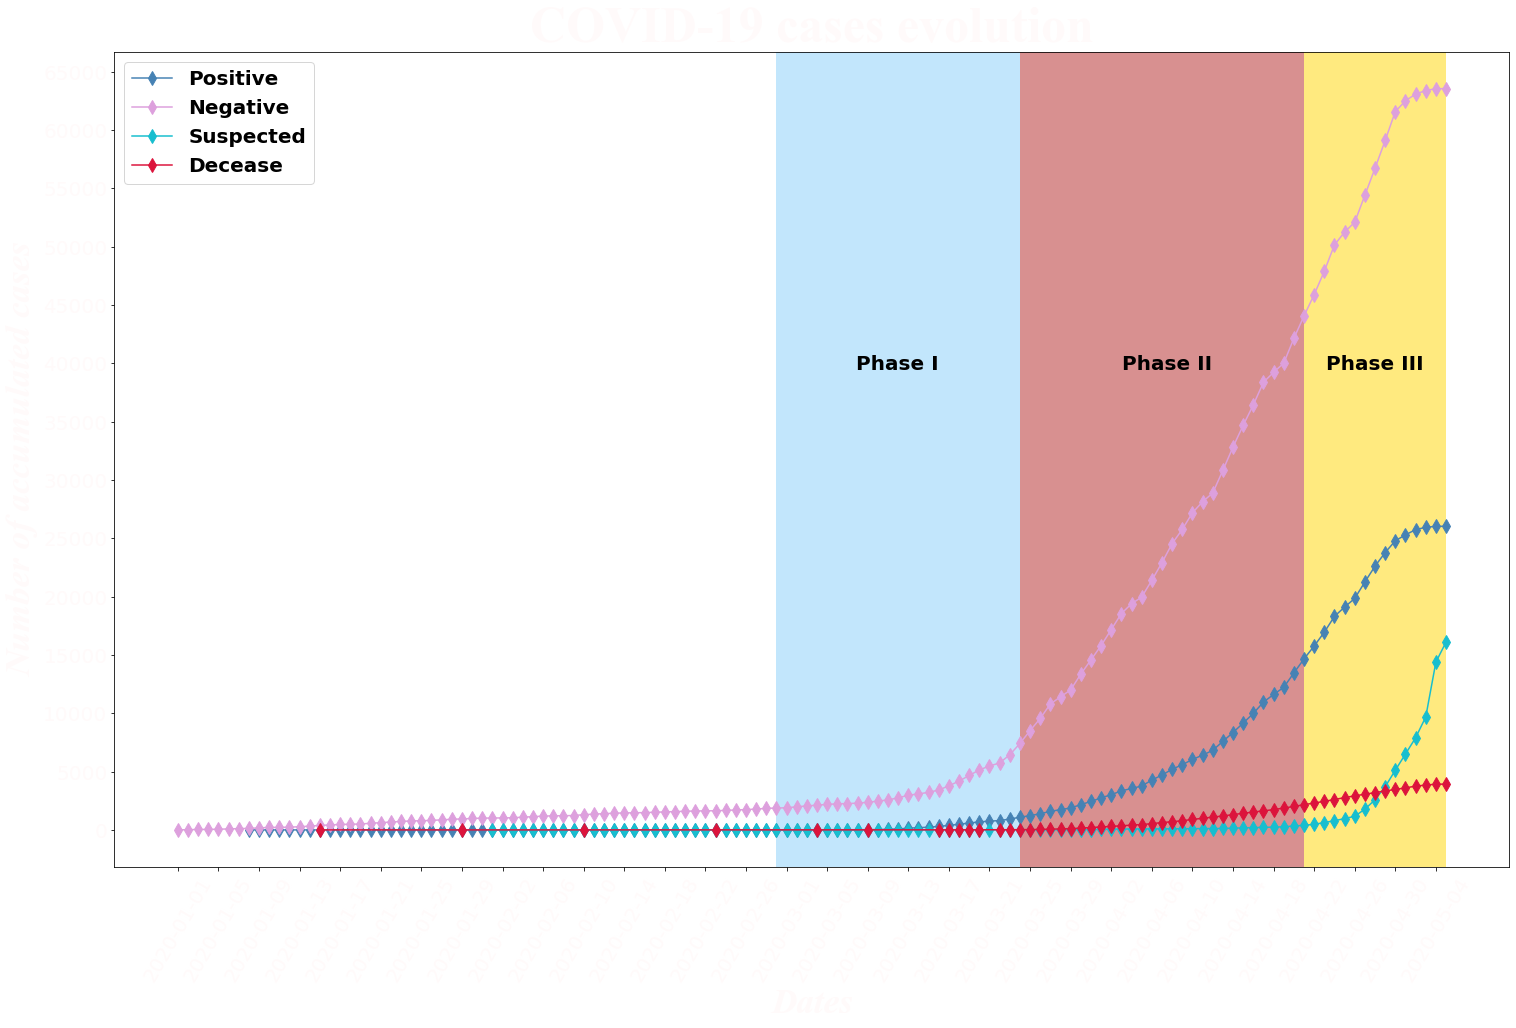

In [39]:
# Make a plot chart that illustrates the distribution of the COVID-19 cases in Mexico considering the phases of contingency
plt.figure(figsize=(25,15))
plt.plot(covid_cases_merge2_df['POSITIVOS'],marker="d", linestyle='-',ms=10,color="steelblue",linewidth=1.5,label='Positive')
plt.plot(covid_cases_merge2_df['NEGATIVOS'],marker="d", linestyle='-',ms=10,color="plum",linewidth=1.5,label='Negative')
plt.plot(covid_cases_merge2_df['SOSPECHOSOS'],marker="d", linestyle='-',ms=10,color="tab:cyan",linewidth=1.5,label='Suspected')
plt.plot(covid_decease_cases_df,marker="d", linestyle='-',ms=10,color="crimson",linewidth=1.5,label='Decease')
plt.xlabel("Dates",style="italic",color='snow',family="Times New Roman",fontsize=35)
plt.ylabel('Number of accumulated cases',style="italic",color='snow',family="Times New Roman",fontsize=35)
plt.title('COVID-19 cases evolution',fontsize=50,color='snow',fontweight="semibold", family="Times New Roman")
plt.xticks(np.arange(0, 125, step=4),rotation=60,color='snow',fontsize=20)
plt.yticks(np.arange(0, 70000, step=5000),color='snow',fontsize=20)
legend1=plt.legend(loc='upper left',prop={'size': 20,'weight':'bold'})
phaseI=plt.axvspan('2020-02-29','2020-03-24',facecolor='lightskyblue', alpha=0.5)
phaseII=plt.axvspan('2020-03-24','2020-04-21',facecolor='firebrick', alpha=0.5)
phaseIII=plt.axvspan('2020-04-21','2020-05-05',facecolor='gold', alpha=0.5)
plt.figtext(0.56, 0.6,'Phase I', wrap=True,ha='center',va='top',fontsize=20,fontweight="bold")
plt.figtext(0.71, 0.6,'Phase II', wrap=True,ha='center',va='top',fontsize=20,fontweight="bold")
plt.figtext(0.825, 0.6,'Phase III', wrap=True,ha='center',va='top',fontsize=20,fontweight="bold")
plt.savefig('Results_visualizations/COVID-19_cases_evolution.png')
plt.show()